In [74]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from collections import Counter

### Collaboration between the researchers

#### a. Are there enough collaborations across different research fields?

In [75]:
with open('data/author_data.json') as f:
    data = json.load(f)

In [76]:
authors = []
for author_id, details in data.items():
    publication_topics = [topic['name'] for topic in details['publication topics']]
    authors.append({
        'author_id': author_id,
        'author_name': f"{details['first name']} {details['last name']}",
        'affiliation': details['affiliations'],
        'publication_topics': publication_topics
    })

df = pd.DataFrame(authors)
display(df)

,author_id,author_name,affiliation,publication_topics
0,99659859971,Junyi Shu,[Peking University],"[External storage, Storage management]"
1,99659853258,Xin Jin,[Peking University],"[Cloud computing, Cloud computing, Distributed..."
2,84758643357,Yun Ma,"[Peking University, Tsinghua University, Key L...","[Software testing and debugging, Empirical stu..."
3,84459152157,Xuanzhe Liu,"[Peking University, Key Lab of High Confidence...","[Web applications, Cloud computing, Ubiquitous..."
4,81350600064,Gang Huang,"[Peking University, Key Lab of High Confidence...","[Software architectures, Web applications, Dis..."
...,...,...,...,...
2250,81100592757,Todd Alan Proebsting,"[The University of Arizona, Microsoft Research...","[Compilers, Source code generation, Language f..."
2251,81100534748,Chungshyan Liu,[Chung Yuan Christian University],[Network protocols]
2252,81452604235,Simon S Lam,"[The University of Texas at Austin, IEEE]","[Network protocols, Communication hardware, in..."
2253,81100012520,D. L. Mills,"[Fountainhead College of Technology, Universit...","[Network protocols, Network architectures, Pro..."


In [77]:
coauthors = []
for author_id, details in data.items():
    coauthor_ids = [coauthor['id'] for coauthor in details['coAuthors']]
    coauthor_names = [f"{coauthor['first name']} {coauthor['last name']}" for coauthor in details['coAuthors']]
    coauthors.append({
        'author_id': author_id,
        'coauthor_ids': coauthor_ids,
        'coauthor_names': coauthor_names
    })

coauthors_df = pd.DataFrame(coauthors)
display(coauthors_df)

,author_id,coauthor_ids,coauthor_names
0,99659859971,"[99659853258, 84459152157, 84758643357, 813506...","[Xin Jin, Xuanzhe Liu, Yun Ma, Gang Huang]"
1,99659853258,"[84459109657, 81467644390, 81350600064, 815480...","[Peng Cheng, Mosharaf Chowdhury, Gang Huang, H..."
2,84758643357,"[81350600064, 84459152157, 99659859971, 996598...","[Gang Huang, Xuanzhe Liu, Junyi Shu, Xin Jin]"
3,84459152157,"[84459109657, 99659853258, 81350600064, 815480...","[Peng Cheng, Xin Jin, Gang Huang, Hongqiang Ha..."
4,81350600064,"[84459109657, 99659853258, 84459152157, 996598...","[Peng Cheng, Xin Jin, Xuanzhe Liu, Junyi Shu, ..."
...,...,...,...
2250,81100592757,"[81100132568, 81100028408, 81100222430, 811005...","[Patrick G. Bridges, Oliver Spatscheck, Dawson..."
2251,81100534748,[],[]
2252,81452604235,"[81542072156, 81100174801, 81100067662, 811003...","[Xiaozhousteve Li, Lili Qiu, Mohamed Gawdat Go..."
2253,81100012520,[],[]


In [78]:
# Identify cross-field collaborations ()
collaborations = []
for index, author_row in df.iterrows():
    author_id = author_row['author_id']
    author_topics = set(author_row['publication_topics'])
    
    coauthor_info = coauthors_df[coauthors_df['author_id'] == author_id].iloc[0]
    for coauthor_id in coauthor_info['coauthor_ids']:
        if coauthor_id in data:
            coauthor_topics = set([topic['name'] for topic in data[coauthor_id]['publication topics']])
            common_topics = author_topics.intersection(coauthor_topics)
            cross_field = bool(author_topics - coauthor_topics or coauthor_topics - author_topics)
            collaborations.append({
                'author_id': author_id,
                'coauthor_id': coauthor_id,
                'author_topics': list(author_topics),
                'coauthor_topics': list(coauthor_topics),
                'common_topics': list(common_topics),
                'cross_field_collaboration': cross_field
            })

collaborations_df = pd.DataFrame(collaborations)
display(collaborations_df)

,author_id,coauthor_id,author_topics,coauthor_topics,common_topics,cross_field_collaboration
0,99659859971,99659853258,"[Storage management, External storage]","[Data management systems, Network management, ...","[Storage management, External storage]",True
1,99659859971,84459152157,"[Storage management, External storage]","[Web application security, User models, Collab...",[],True
2,99659859971,84758643357,"[Storage management, External storage]","[Metrics, Integrated and visual development en...","[Storage management, External storage]",True
3,99659859971,81350600064,"[Storage management, External storage]","[Software maintenance, Integrated and visual d...",[],True
4,99659853258,84459109657,"[Data management systems, Network management, ...","[Data center networks, Cloud computing, In-net...","[In-network processing, Network management, Di...",True
...,...,...,...,...,...,...
23648,81452604235,81455605792,"[Protocol testing and verification, Video summ...","[Networks, Communication hardware, interfaces ...","[Networks, Network protocols, Communication ha...",True
23649,81100417344,81100256257,"[Information theory, Web-based interaction, Se...","[Pricing and resource allocation, Network mana...","[Wireless access networks, Mobile networks]",True
23650,81100417344,81452604235,"[Information theory, Web-based interaction, Se...","[Protocol testing and verification, Video summ...","[Distributed systems organizing principles, Di...",True
23651,81100417344,81100256618,"[Information theory, Web-based interaction, Se...","[Security protocols, Network monitoring, Mobil...","[Network monitoring, Wireless access networks,...",True


In [79]:
# Analyze and visualize the cross-field collaborations
cross_field_collaborations = collaborations_df['cross_field_collaboration'].mean()

print(f"Percentage of Cross-field Collaborations: {cross_field_collaborations * 100:.2f}%")

Percentage of Cross-field Collaborations: 97.35%


Comment: In the code above, I set cross_field_collaboration to "True" as long as the two authors have different research topics. However, a more strict definition of cross-field collaboration might be that the two authors have no "publication_topics" in common.

In [80]:
# Analyze the percentage of more strict cross-field collaborations
strict_cross_field = collaborations_df[(collaborations_df['cross_field_collaboration'] == True) & (collaborations_df['common_topics'].apply(lambda x: len(x) == 0))]
percentage_strict_cross_field = (len(strict_cross_field) / len(collaborations_df)) * 100
print(f"Percentage of More Strict Cross-field Collaborations: {percentage_strict_cross_field:.2f}%")

Percentage of More Strict Cross-field Collaborations: 4.58%


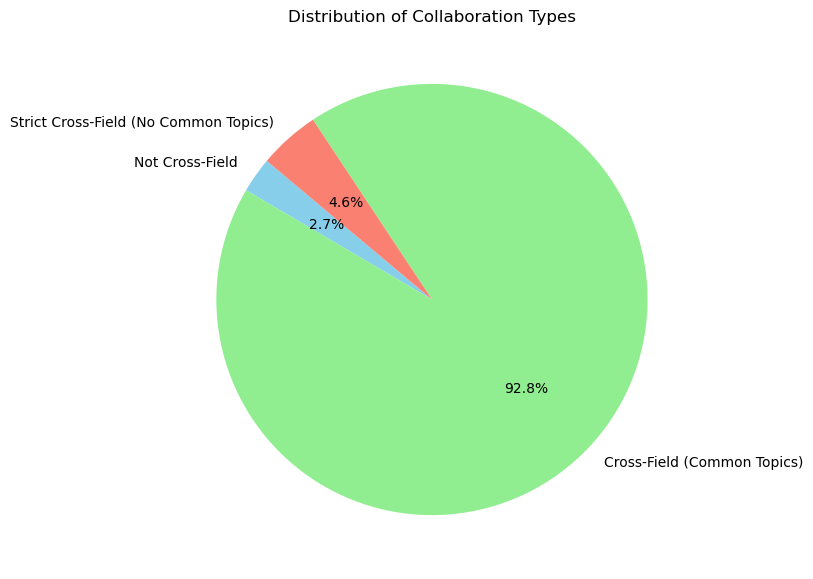

In [81]:
# Visualization
no_cross_field = collaborations_df[collaborations_df['cross_field_collaboration'] == False]
cross_field = collaborations_df[(collaborations_df['cross_field_collaboration'] == True) & (collaborations_df['common_topics'].apply(lambda x: len(x) != 0))]

values = [len(no_cross_field), len(cross_field), len(strict_cross_field)]
labels = ['Not Cross-Field', 'Cross-Field (Common Topics)', 'Strict Cross-Field (No Common Topics)']

plt.figure(figsize=(10, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Collaboration Types')
plt.show()

#### c. Do top researchers tend to collaborate with the same group of people?

This question involves tracking collaboration patterns over time to see how they evolve, so the publication time information in paper_data.json might be helpful.

In [82]:
with open('data/paper_data.json') as file:
    paper_data = json.load(file)

In [83]:
# Create a list to hold collaboration data over time
collaborations_time = []

for paper_id, paper in paper_data.items():
    year = paper['publication year']
    authors = [author['id'] for author in paper['authors']]
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            collaborations_time.append({'year': year, 'author1': authors[i], 'author2': authors[j]})

# Create a DataFrame for collaborations
collaborations_time_df = pd.DataFrame(collaborations_time)

In [84]:
display(collaborations_time_df)

,year,author1,author2
0,2003,81100276127,81100296955
1,2003,81100276127,81100214425
2,2003,81100276127,81452610439
3,2003,81100296955,81100214425
4,2003,81100296955,81452610439
...,...,...,...
14404,2000,81100082633,81100102913
14405,2000,81100344510,81100102913
14406,2000,81332529871,81100559460
14407,2000,81100223402,81100394237


Create a collaboration graph for each year, where each node represents an author and each edge represents a collaboration

In [85]:
import networkx as nx

In [86]:
# Create a dictionary of graphs by year
graphs_by_year = {}
for year, group in collaborations_time_df.groupby('year'):
    G = nx.from_pandas_edgelist(group, 'author1', 'author2')
    graphs_by_year[year] = G

In [87]:
print(graphs_by_year)

{'1994': <networkx.classes.graph.Graph object at 0x00000202BB4483A0>, '1995': <networkx.classes.graph.Graph object at 0x00000202BB448340>, '1996': <networkx.classes.graph.Graph object at 0x00000202BB448310>, '1997': <networkx.classes.graph.Graph object at 0x00000202BB448B20>, '1998': <networkx.classes.graph.Graph object at 0x00000202B9DADF70>, '1999': <networkx.classes.graph.Graph object at 0x00000202BB448AF0>, '2000': <networkx.classes.graph.Graph object at 0x00000202B9DAD340>, '2001': <networkx.classes.graph.Graph object at 0x00000202BB448670>, '2002': <networkx.classes.graph.Graph object at 0x00000202B9DAD970>, '2003': <networkx.classes.graph.Graph object at 0x00000202C56461C0>, '2011': <networkx.classes.graph.Graph object at 0x00000202C3B00AC0>, '2013': <networkx.classes.graph.Graph object at 0x00000202C56460D0>, '2014': <networkx.classes.graph.Graph object at 0x00000202BB4482E0>, '2015': <networkx.classes.graph.Graph object at 0x00000202C3B00D60>, '2016': <networkx.classes.graph.G

Analyze Community Structure Over Time (Louvain Method)

In [88]:
import community as community_louvain

In [89]:
# Detect and analyze communities for each year
community_partitions = {}

for year, graph in graphs_by_year.items():
    partition = community_louvain.best_partition(graph)
    community_partitions[year] = partition
    size_of_communities = len(set(partition.values()))
    print(f"Year {year}: {size_of_communities} communities detected")

Year 1994: 19 communities detected
Year 1995: 25 communities detected
Year 1996: 18 communities detected
Year 1997: 21 communities detected
Year 1998: 20 communities detected
Year 1999: 20 communities detected
Year 2000: 23 communities detected
Year 2001: 19 communities detected
Year 2002: 18 communities detected
Year 2003: 27 communities detected
Year 2011: 53 communities detected
Year 2013: 55 communities detected
Year 2014: 64 communities detected
Year 2015: 54 communities detected
Year 2016: 46 communities detected
Year 2017: 29 communities detected
Year 2018: 30 communities detected
Year 2019: 49 communities detected
Year 2020: 35 communities detected
Year 2021: 28 communities detected
Year 2022: 34 communities detected
Year 2023: 56 communities detected


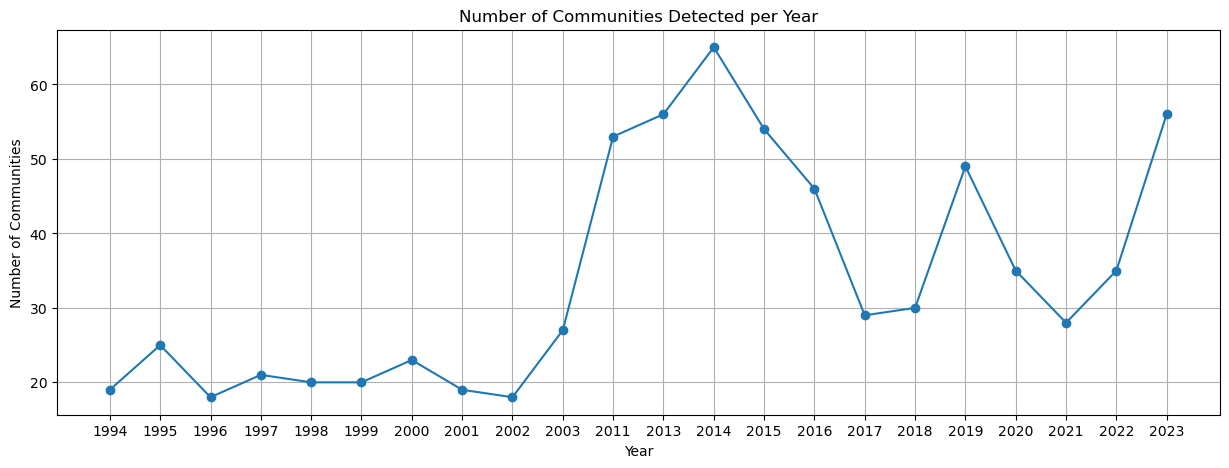

In [90]:
# Plot the number of communities over time
community_counts = {}

for year, graph in graphs_by_year.items():
    partition = community_louvain.best_partition(graph)
    num_communities = len(set(partition.values()))
    community_counts[year] = num_communities

years = sorted(community_counts.keys())
num_communities = [community_counts[year] for year in years]

plt.figure(figsize=(15, 5))
plt.plot(years, num_communities, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Communities')
plt.title('Number of Communities Detected per Year')
plt.grid(True)
plt.show()

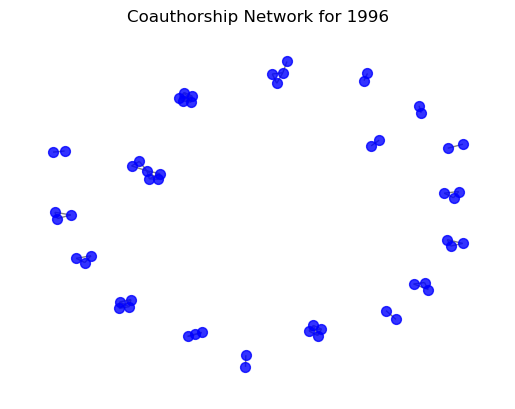

In [91]:
# Plot the graph in 1996
graph_1996 = graphs_by_year['1996']

pos = nx.spring_layout(graph_1996)
nx.draw_networkx_nodes(graph_1996, pos, node_color='blue', node_size=50, alpha=0.8)
nx.draw_networkx_edges(graph_1996, pos, edge_color='gray')

plt.title("Coauthorship Network for 1996")
plt.axis('off')
plt.show()

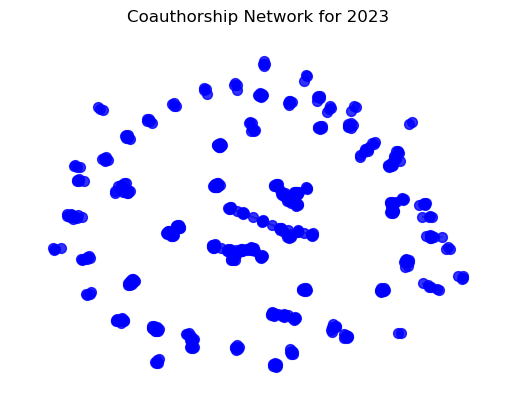

In [92]:
# Plot the graph in 2023
graph_2023 = graphs_by_year['2023']

pos = nx.spring_layout(graph_2023)
nx.draw_networkx_nodes(graph_2023, pos, node_color='blue', node_size=50, alpha=0.8)
nx.draw_networkx_edges(graph_2023, pos, edge_color='gray')

plt.title("Coauthorship Network for 2023")
plt.axis('off')
plt.show()

To answer the research question, I plan to examine the collaboration patterns of the top ten authors who has the most collaborations with others.

In [93]:
# Count total collaborations for each author
collaboration_counts = Counter()
for index, row in coauthors_df.iterrows():
    collaboration_counts[row['author_id']] += len(row['coauthor_ids'])  # Count coauthors for the main author

# Identify the top ten collaborators
top_ten = dict(collaboration_counts.most_common(10))
top_authors = list(top_ten.keys())
print("Top 10 Collaborators by ID:", top_authors)

Top 10 Collaborators by ID: ['81100282775', '81100508545', '81100104394', '81100056982', '81100294250', '81100539986', '81100086287', '81100095142', '81100128133', '81319494709']


In [98]:
author_id_to_name = pd.Series(df.author_name.values, index=df.author_id).to_dict()

Demonstrate the example with researcher '81100282775'

In [104]:
selected_author = top_authors[0]

author_collaborations = collaborations_time_df[
    (collaborations_time_df['author1'] == selected_author) | 
    (collaborations_time_df['author2'] == selected_author)
]

author_collaborations['coauthor'] = author_collaborations.apply(
    lambda row: row['author2'] if row['author1'] == selected_author else row['author1'], axis=1
)

author_collaborations['coauthor_name'] = author_collaborations['coauthor'].map(author_id_to_name)
author_collaborations = author_collaborations.dropna(subset=['coauthor_name'])
coauthors_by_year = author_collaborations.groupby('year')['coauthor_name'].apply(list).sort_index()

C:\Users\Bingheng Li\AppData\Local\Temp\ipykernel_10936\962609873.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_collaborations['coauthor'] = author_collaborations.apply(
C:\Users\Bingheng Li\AppData\Local\Temp\ipykernel_10936\962609873.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_collaborations['coauthor_name'] = author_collaborations['coauthor'].map(author_id_to_name)


In [106]:
accumulated_coauthors = {}
cumulative_coauthors = set()

sorted_years = sorted(coauthors_by_year.keys())

for year in sorted_years:
    accumulated_coauthors[year] = cumulative_coauthors.copy()
    current_year_coauthors = set(coauthors_by_year[year])
    cumulative_coauthors.update(current_year_coauthors) 

overlap_percentages = {}
for year in sorted_years:
    current_coauthors = set(coauthors_by_year[year])
    previous_coauthors = accumulated_coauthors[year]
    if previous_coauthors: 
        intersection = current_coauthors.intersection(previous_coauthors)
        union = current_coauthors.union(previous_coauthors)
        overlap = len(intersection) / len(union)
        overlap_percentages[year] = overlap * 100 
    else:
        overlap_percentages[year] = 0 

for year, overlap in overlap_percentages.items():
    print(f"Overlap in {year} with all previous years: {overlap:.2f}%")

Overlap in 1994 with all previous years: 0.00%
Overlap in 1995 with all previous years: 0.00%
Overlap in 1998 with all previous years: 20.00%
Overlap in 1999 with all previous years: 12.50%
Overlap in 2000 with all previous years: 33.33%
Overlap in 2001 with all previous years: 0.00%
Overlap in 2002 with all previous years: 14.29%
Overlap in 2003 with all previous years: 8.33%
Overlap in 2013 with all previous years: 0.00%
Overlap in 2014 with all previous years: 0.00%
Overlap in 2015 with all previous years: 2.53%
Overlap in 2016 with all previous years: 2.44%
Overlap in 2017 with all previous years: 3.61%
Overlap in 2018 with all previous years: 3.57%
Overlap in 2020 with all previous years: 4.65%


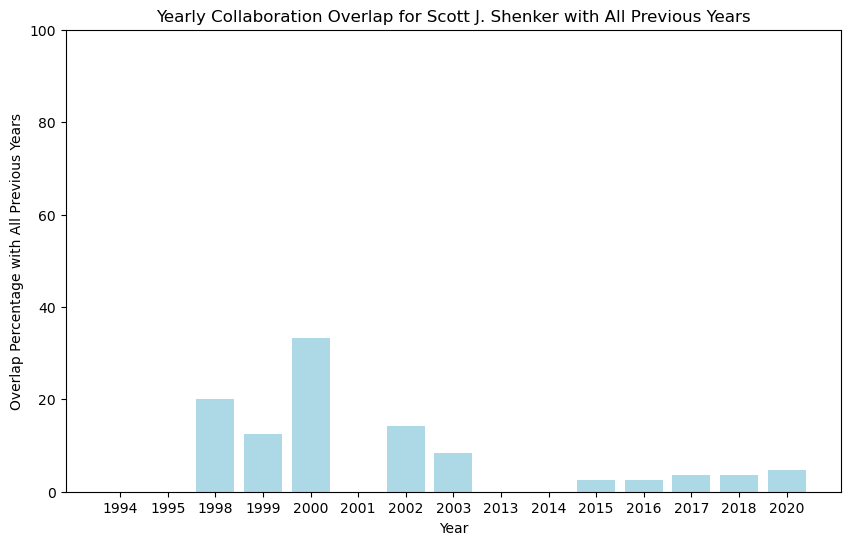

In [107]:
# Lists to store data for plotting
years = list(overlap_percentages.keys())
overlaps = list(overlap_percentages.values())

# Create a bar chart to visualize the overlap percentages
plt.figure(figsize=(10, 6))
plt.bar(years, overlaps, color='lightblue')
plt.xlabel('Year')
plt.ylabel('Overlap Percentage with All Previous Years')
plt.title(f"Yearly Collaboration Overlap for {author_id_to_name[selected_author]} with All Previous Years")
plt.ylim(0, 100)  # Limit the y-axis from 0 to 100 for percentage
plt.show()

In [112]:
# Dictionary to keep track of all coauthors the selected author has collaborated with by each year
past_collaborators = {}
accumulated_coauthors = set()

# Sorted list of years for processing
sorted_years = sorted(coauthors_by_year.keys())

for year in sorted_years:
    current_year_coauthors = set(coauthors_by_year[year])
    past_collaborators[year] = accumulated_coauthors.copy()  # Copy accumulated coauthors before updating
    accumulated_coauthors.update(current_year_coauthors)  # Update with current year's coauthors

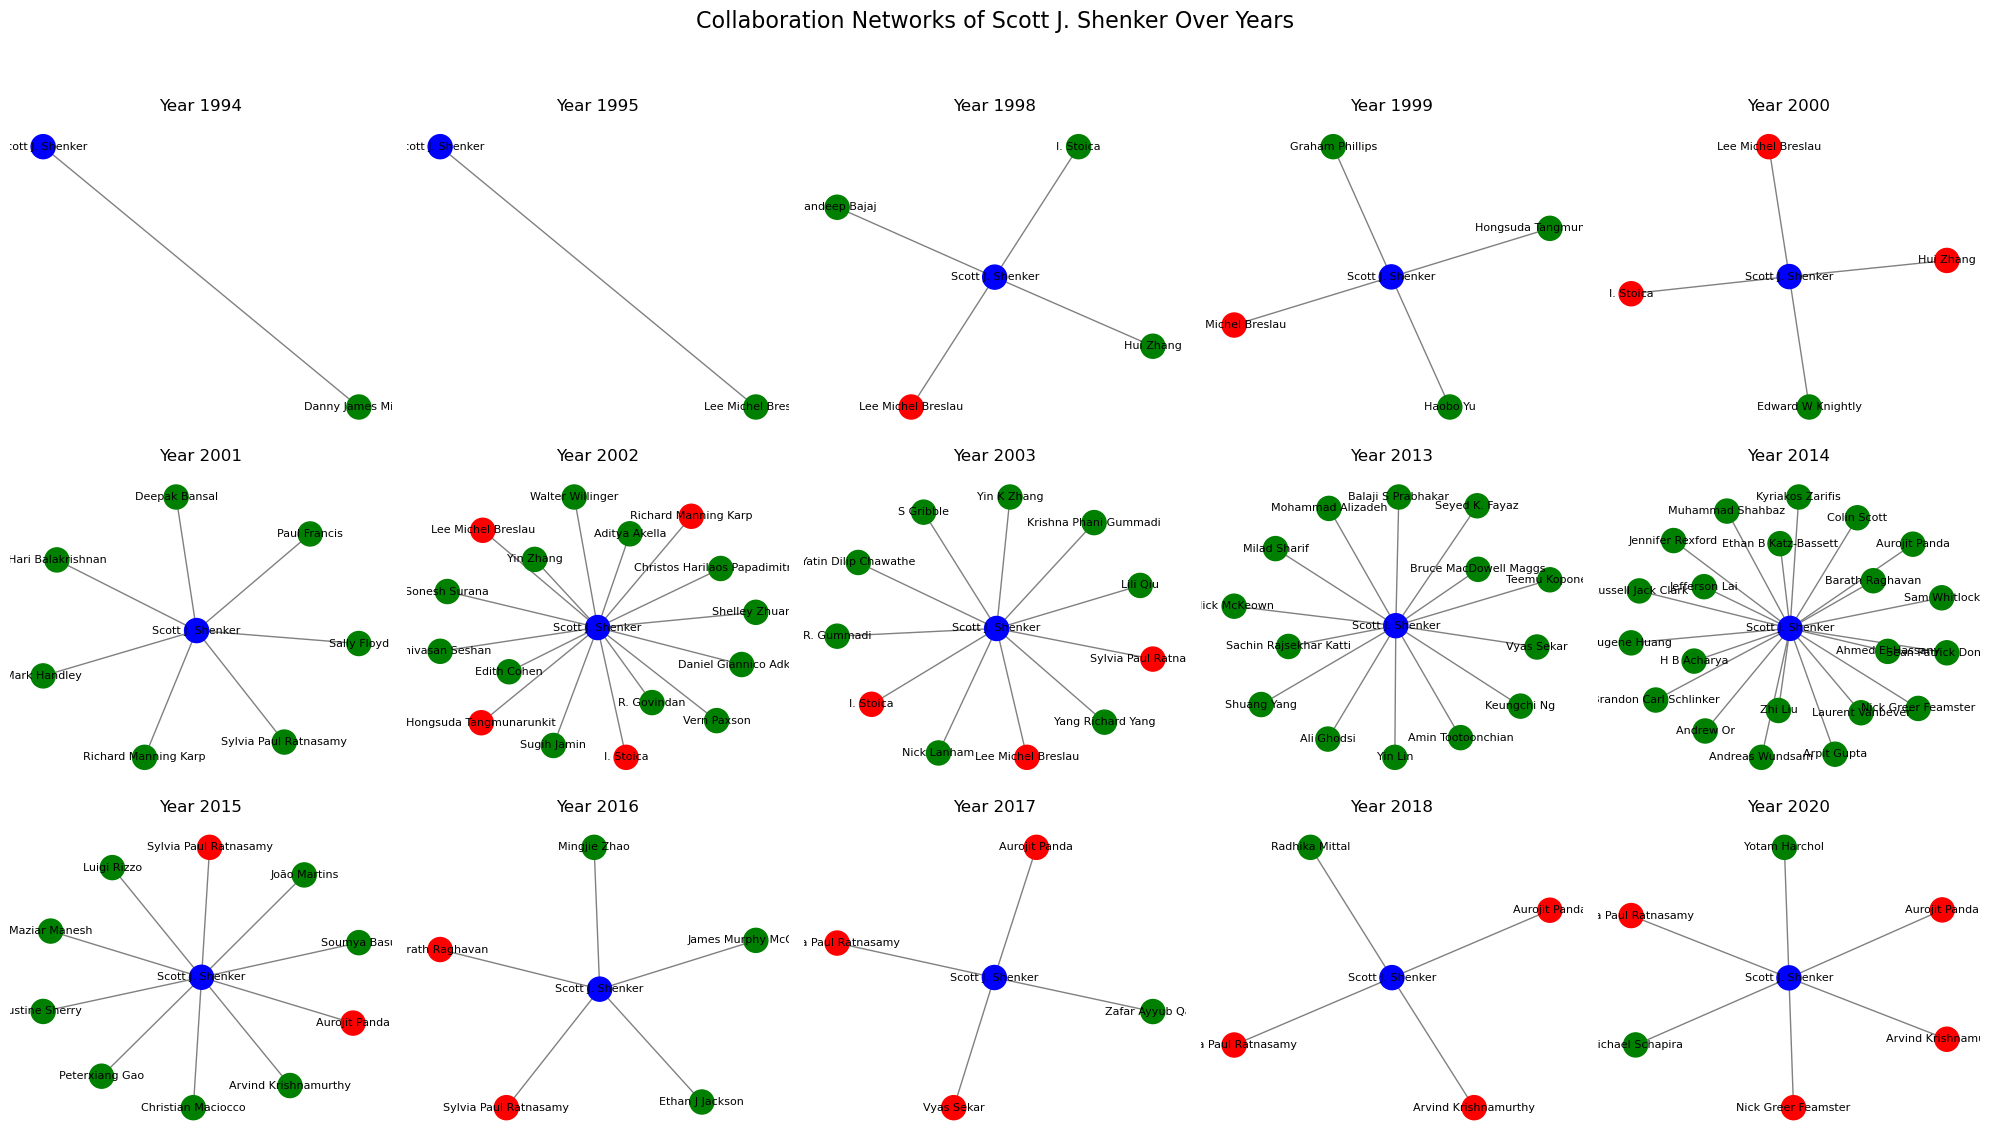

In [114]:
selected_author_name = author_id_to_name[selected_author]
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
fig.suptitle(f"Collaboration Networks of {selected_author_name} Over Years", fontsize=16)

axes = axes.flatten()

for i, year in enumerate(sorted_years):
    G = nx.Graph()
    coauthors = coauthors_by_year[year]
    previous_collaborators = past_collaborators[year]

    # Add nodes and edges
    G.add_node(selected_author_name, color='blue')
    for coauthor_name in coauthors:
        # Check if they have collaborated before
        color = 'red' if coauthor_name in previous_collaborators else 'green'
        G.add_node(coauthor_name, color=color)
        G.add_edge(selected_author_name, coauthor_name)

    ax = axes[i]
    plt.sca(ax)
    pos = nx.spring_layout(G) 

    node_colors = [nx.get_node_attributes(G, 'color')[node] for node in G]
    nx.draw_networkx(G, pos, ax=ax, node_color=node_colors, edge_color='gray', with_labels=True, font_size=8)
    ax.set_title(f"Year {year}")
    ax.axis('off')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()